# Grant's Analysis of Baasil's data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
# Let's take a peak first
b_times_df = pd.read_csv('Bdata/timestamps.csv')
b_times_df

,endTime
0,2022-12-02 00:03:00
1,2022-12-02 00:06:00
2,2022-12-02 00:09:00
3,2022-12-02 00:12:00
4,2022-12-02 00:13:00
...,...
9995,2023-02-23 02:17:00
9996,2023-02-23 02:20:00
9997,2023-02-23 02:23:00
9998,2023-02-23 02:26:00


It looks like there's quite a bit of data. I might be ready to rule out things like Netflix or Spotify data already but let's keep looking

In [40]:
# Convert the times column to datetime format and put them in order
b_times_df['endTime'] = pd.to_datetime(b_times_df['endTime'])
b_times_df = b_times_df.sort_values(by='endTime')

# Calculate the time difference between consecutive timestamps
b_times_df['time_diff'] = b_times_df['endTime'].diff()

# Let's check out our time_diff column
b_times_df.describe()


,time_diff
count,9999
mean,0 days 00:11:58.463846384
std,0 days 01:22:26.201854253
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:02:00
75%,0 days 00:03:00
max,1 days 22:45:00


In [41]:

# We see them in the summary statistics but lets print out the longest and average times between timestamps
longest_time_diff = b_times_df['time_diff'].max()
average_time_diff = b_times_df['time_diff'].mean()

print(f"The longest difference between timestamps is {longest_time_diff}")
print(f"The average difference between timestamps is {average_time_diff}")

The longest difference between timestamps is 1 days 22:45:00
The average difference between timestamps is 0 days 00:11:58.463846384


In [42]:

# Creating new columns for the full date and another for month (without time)
b_times_df['full_date'] = b_times_df['endTime'].dt.date
b_times_df['month'] = b_times_df['endTime'].dt.month

# Finding the date with the most timestamps
date_with_most_timestamps = b_times_df['full_date'].value_counts().idxmax()
number_of_events_on_date = b_times_df['full_date'].value_counts().max()

# Finding the date with the most timestamps
month_with_most_timestamps = b_times_df['month'].value_counts().idxmax()
number_of_events_in_month = b_times_df['month'].value_counts().max()

print(f"The date with the most timestamps was {date_with_most_timestamps}. On this day there were {number_of_events_on_date} stamps.")
print(f"The month with the most timestamps was {month_with_most_timestamps}. During this month there were {number_of_events_in_month} stamps.")



The date with the most timestamps was 2023-02-04. On this day there were 304 stamps.
The month with the most timestamps was 12. During this month there were 3775 stamps.


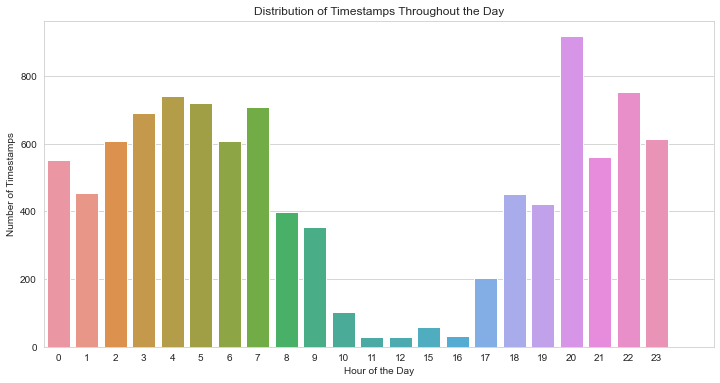

In [43]:
# Let's extrract the hour of the day and day of the week using datetime properties
b_times_df['hour'] = b_times_df['endTime'].dt.hour
b_times_df['weekday'] = b_times_df['endTime'].dt.weekday


# Plotting the distribution of timestamps throughout the day
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=b_times_df)
plt.title('Distribution of Timestamps Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Timestamps')
plt.xticks(range(0, 24))
plt.show()


Okay so lots of evening activity and a drop during the afternoon. The high activity times line up with times that someone would be asleep or in bed.

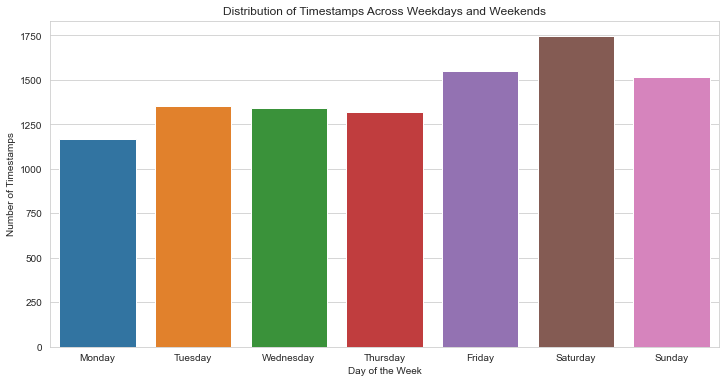

In [44]:

# Next we'll checkout the distribution of dimestamps across weekdays and weekends
plt.figure(figsize=(12, 6))
sns.countplot(x='weekday', data=b_times_df)
plt.title('Distribution of Timestamps Across Weekdays and Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Timestamps')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


Higher activity towards the weekend. This also seems to suggest that downtime or resting time is when this data is collected.

#### Best Guess
It appears that the data that these timestamps correspond to are collected primarily during the late evenings and early mornins and collected for longer intervals over the weekend. Because of this and the average diff being around 12 minutes and the median diff being around 2 minutes, I might guess that not only is this data downloaded from some type of sleep sensor, but that it is from a sensor collecting more information such as respitory rate or heart rate during sleep. I say this because I know that my phone's sleep data only collects large intervals during sleep and it is uncommon to see hundreds of intervals of activity being collected. This could be a difference in phones, but I still get the feeling that this frequency is more similar to a more volitile measurement such as location or breathing rate and the peak activity times are not reminiscent of location data. Based on all of this, my guess is that this data is probably from an Apple watch or something of the sort and it is monitering some health metric.

# Baasil's Comments on Grant's Analysis

The type of data was not guessed correctly, although Grant did some very good analysis to reach that conclusion. The source of data was my spotify listening history. I am not sure what was happeing on that day, but in December I have more free time to listen to music because of winterbreak which makes sense. I feel like if I got my location data I could definitley figure out what was happening on that day. 
